Nesta atividade vocês irão aplicar os mesmos conceitos de validação cruzada, seleção de variáveis e regularização vistos em aula, mas agora em um modelo de classificação. 

## 1. Parte Teórica

### 1.1 Validação Cruzada (2 pontos)

a) Explique, usando suas palavras, quais as diferenças e vantagens em usar uma validação cruzada com 5 divisões (5-fold) para estimar o erro no conjunto de teste, quando comparado à validação simples, com 50% dos dados como conjunto de teste.

Considere aspectos como tempo de execução, variabilidade nas estimativas e viés do modelo treinado.

***Resposta:***

A diferença entre a validação simples e validação cruzada usando 5-fold é que no segundo caso, o conjunto de treino é dividido em 5 conjuntos, onde um desses conjuntos será usado para validação, e iterativamente são treinados 5 modelos, onde cada modelo usa um conjunto diferente para validação. No fimdo processo 5 medidas das métricas de ajustes são obtidas.

Entre as vantagens do k-fold está a possibilidade de analisar mais profundamente as métricas geradas, e diferentemente da única medida obtida na validação simples, não há confusão causada pela ordem dos dados na divisão dos conjuntos, trazendo mais confiança nos resultados obtidos. Também é possível escolher a melhor possibilidade de divisão entre treino e validação, que resulta em menor viés no modelo treinado e melhor ajuste aos dados.

Porém, a técnica requer treinar k modelos e portanto, essa etapa leva k vezes mais tempo que a validação simples, e se tempo de treino é um impedimento, usar k-fold pode ser muito custoso.

b) Em um conjunto com 100 exemplos, quais as vantagens e desvantagens de usarmos a validação cruzada com 5 divisões com relação ao Leave-One-Out (LOO)?

***Resposta:***

Nesse caso, dividir 5 vezes o dataset significa reduzir em 20% o tamanho total do conjunto de treino para separar o conjunto de validação, logo existem menos exemplos de treino, o reduz o potencial de ajuste do modelo treinado. Porém, com mais dados no conjunto de validação as métricas de ajuste obtidas são mais confiáveis por cobrirem um número maior de exemplos diferentes dos usados durante o treino. O tempo de execução do treino é 5 vezes maior que o tempo de execução da validação simples por testar 5 combinações diferentes.

Usando o Leave-One-Out, apenas 1 exemplo será separado do conjunto de treino, logo o potencial de ajuste do modelo treinado é maior por possuir um conjunto maior. Porém o resultado das métricas de ajuste depende completamente do exemplo usado para validação, logo esse resultado possui muito mais variabilidade e é menos confiável. O tempo de execução do treino é 100 vezes maior que o tempo de execução da validação simples por testar 100 combinações diferentes, portanto leva muito mais tempo que o k-fold para treinar os modelos.

### 1.2 Seleção de Variáveis e Regularização (2 pontos)

a) Compare, usando suas palavras, a regressão ridge e a lasso. Discuta (i) sua formulação, (ii) o que ocorre com os coeficientes dos preditores e (iii) quando cada uma delas é vantajosa


***Resposta:***

#### Ridge

Técnica de regressão que usa uma função de custo modificada envolvendo o RSS e a regularização $\beta_2$:
$$
\sum^n_{i=1}\left(y_i-\beta_0-\sum^p_{j=1}\beta_jx_{ij}\right)^2 + \lambda \sum^p_{j=1}\beta^2_j=RSS + \lambda \sum^p_{j=1}\beta^2_j \\ ~ \\

\|\beta\|_2 = \sqrt{\sum^p_{j=1}\beta^2_j} \\ ~ \\

\lambda \geq 0 ~ \text{(Hiperparâmetro)}
$$
A regressão Ridge reduz gradualmente os coeficientes das variáveis que não contribuem para a predição do modelo durante o treino, minimizando o impacto causado pelas variáveis com pouca relação com a variável predita. O parâmetro $\lambda$ controla a severidade dessa penalidade e é definida pelo usuário antes do treino. Porém a regularização L2 faz com que esses coeficientes apenas tendam a zero e nunca sejam efetivamente eliminados, e se não for feita nenhuma seleção de variáveis anteriormente o modelo final pode se tornar mais complexo de explicar que o gerado por outras abordagens. Em casos onde o melhor ajuste aos dados é mais importante que a explicabilidade (frequentemente em casos de predição), Ridge é mais vantajosa.

#### Lasso

Técnica de regressão que usa uma função de custo modificada envolvendo o RSS e a regularização L1:
$$
\sum^n_{i=1}\left(y_i-\beta_0-\sum^p_{j=1}\beta_jx_{ij}\right)^2 + \lambda \sum^p_{j=1}\|\beta_j\| = RSS + \lambda \sum^p_{j=1}\|\beta_j\| \\ ~ \\
\|\beta\|_1 = \|\beta_j\| \\ ~ \\
\lambda \geq 0 ~ \text{(Hiperparâmetro)}
$$
A regressão Lasso também reduz gradualmente os coeficientes das variáveis que não contribuem para a predição do modelo durante o treino, porém Como consequência da regularização L1, a penalidade nesse contexto pode computar coeficientes iguais a zero se o impacto dos preditores na predição da variável for muito baixo, efetivamente causando seleção de variáveis durante o treino, o que possivelmente gera modelos mais simples de explicar que aqueles produzidos pela regressão Ridge. Porém, essa redução de variáveis pode aumentar o viés do modelo obtido, objetivamente reduzindo o ajuste geral dos dados.
Em casos onde a explicabilidade do modelo é mais importante que o ajuste dos dados (frequentemente em casos de inferência), Lasso é mais vantajosa.

b) Compararemos a seleção de variáveis usando os métodos melhor subconjunto (best subset) e forward stepwise (incremental). 

No caso de um conjunto de dados com 20 preditores, e considerando que o tempo necessário para treinar e avaliar cada modelo gerado no conjunto de treino é *100ms*, qual será o tempo necessário rodar cada método de seleção de variáveis para todos os $k$ (tamnho dos subconjuntos de variáveis)? 

*No cálculo, não é preciso considerar o passo final do algoritmo de seleção, que é a etapa do uso de validação cruzada para seleção do $k$.* 

***Mostre e justifique as contas realizadas***.


***Resposta:***

O melhor subconjunto envolve treinar $2^p$ modelos, logo o tempo de treino será de $2^{20} * 100ms = 104857600ms$ ou aproximadamente 1 dia e 5 horas.
O forward stepwise envolve treinar apenas $\frac{p(p+ 1)}{2} + 1$ modelos, logo o tempo de treino será de $\frac{20(20+ 1)}{2} + 1 = 21100ms$ ou aproximadamente 21 segundos.

In [21]:
def best(p):
    return 2**p
def forward(p):
    return ((p * (p + 1) / 2) + 1)

print(f'{(best(20) * 100) / (3.6 * 10**6):.2f} horas')
print(f'{(forward(20) * 100) / 1000} segundos')

29.13 horas
21.1 segundos


## 2. Parte Prática

Nesta parte faremos os mesmos passos de seleção de variáveis e regularização que fizemos com o modelo de regressão, mas agora aplicando um modelo de classificação ([Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).

Utilizaremos o conjunto de Breast Cancer do scikit-lean ([link1](https://scikit-learn.org/stable/datasets/toy_dataset.html), [link2](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html))

Estes dados não vem normalizados. Para normalizá-los, utilize os comandos abaixo:

```
from sklearn.preprocessing import StandardScaler
X, y = load_breast_cancer(as_frame=True, return_X_y=True)
X1 = StandardScaler().fit_transform(X)
X = pd.DataFrame(X1, columns=X.columns)

```

In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, KFold

import warnings
warnings.filterwarnings("ignore")

X, y = load_breast_cancer(as_frame=True, return_X_y=True)
X1 = StandardScaler().fit_transform(X)
X = pd.DataFrame(X1, columns=X.columns)

### 2.1 Seleção de Variáveis com a Regressão Logística (2 pontos)

a) Crie uma função `AvaliaModelo`, que recebe como parâmetros o modelo de classificação treinado e os conjuntos de preditores e respostas, e devolve os seguintes erros: acurácia, precisão e cobertura. 

Em seguida teste a função. Para tal: (i) divida os dados do dataset em treino (80%) e validação (80%) e (ii) treine o modelo com dados de treinamento e imprima o desempenho do modelo (acurácia, precisão, cobertura e f-score) sobre os dados de treinamento e de teste. 

O F-score mede o equilíbrio entre precisão e cobertura e é uma das medidas mais utilizadas na área de aprendizado de máquina. 

`F1 = 2 * (precision * recall) / (precision + recall)`

Mas informações neste [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [2]:
def avaliaModelo(model, X_train, y_train):
    X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_vali)

    acc = accuracy_score(y_vali, y_pred)
    pre = precision_score(y_vali, y_pred)
    rec = recall_score(y_vali, y_pred)
    f1s = f1_score(y_vali, y_pred)
    
    return acc, pre, rec, f1s

b) Implemente uma função `selectBackward` que realiza a seleção retroativa. 

Em seguida, gere um gráfico contendo 4 linhas (acurácia, precisão e cobertura e f1-score), com o eixo x correspondendo ao número de preditores. Para gerar este gráfico, você deve usar a validação cruzada. Note que o atributo `scoring` pode receber os valores `f1`, `accuracy`, `precision`, e `recall`.

Em seguida, discuta os resultados, explicando qual número de preditores você escolheria e o motivo.

**Dica:** Para este exercício, você usar como base a função `selectForward` vista na aula 5.2 e o código para gerar os gráficos com validação cruzada. 


accuracy	mean texture	mean concave points	radius error	texture error	perimeter error	area error	smoothness error	compactness error	concave points error	symmetry error	fractal dimension error	worst radius	worst perimeter	worst area	worst smoothness	worst compactness	worst concavity	worst concave points	worst symmetry	worst fractal dimension	20
precision	mean concave points	mean fractal dimension	area error	smoothness error	compactness error	fractal dimension error	worst texture	worst perimeter	worst area	worst smoothness	worst concavity	worst symmetry	12
recall	mean concave points	perimeter error	area error	smoothness error	compactness error	fractal dimension error	worst radius	worst texture	worst area	worst smoothness	worst compactness	worst concavity	worst concave points	worst symmetry	worst fractal dimension	15
f1	mean concave points	mean symmetry	mean fractal dimension	radius error	texture error	area error	smoothness error	concave points error	fractal dimension error	worst radius	wo

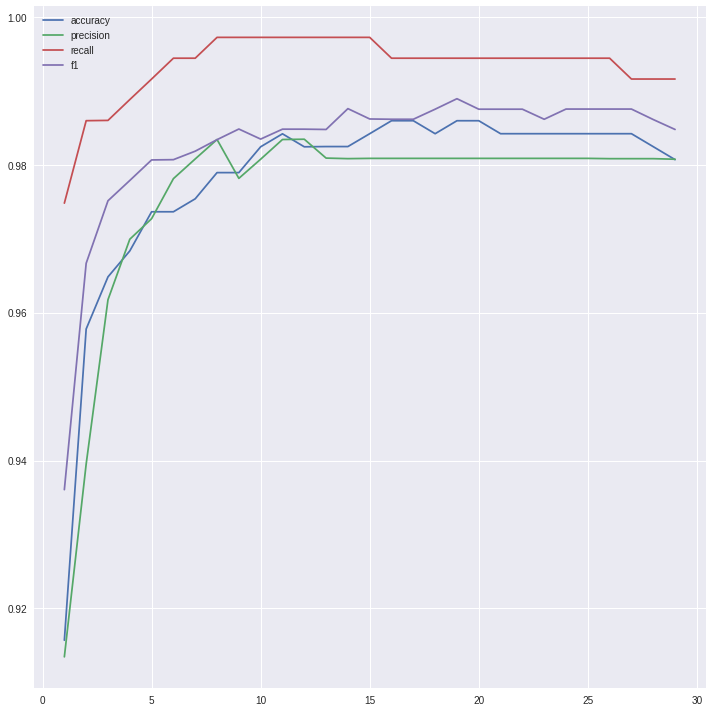

In [3]:
def selectBackward(model, X, y, scoring):
    columns = []
    models = []
    scores = []

    backward_subset  = X.columns.to_list()
    for k in range(len(X.columns)-1, 0, -1):    
        curr_columns = []
        curr_models = []
        curr_scores = []
        
        for i in list(backward_subset):
            curr_X = [j for j in backward_subset if j != i]
            cv_results = cross_validate(model, X[curr_X], y, cv=5, scoring=scoring, return_estimator=True)
            curr_models.append(cv_results['estimator'])
            curr_scores.append(np.mean(cv_results['test_score']))
            curr_columns.append(curr_X)
        
        best_pos = np.argmax(curr_scores)
        backward_subset = curr_columns[best_pos]
        
        columns.append(curr_columns[best_pos])
        models.append(curr_models[best_pos])
        scores.append(curr_scores[best_pos])

    return scores, models, columns

fig = plt.figure(figsize=(10, 10), tight_layout=True)
plot_x = np.flip(np.arange(1, len(X.columns)))
lr = LogisticRegression()
for scoring in ['accuracy', 'precision', 'recall', 'f1']:
    plot_y, models, columns  = selectBackward(lr, X, y, scoring)
    max_score_cols = "\t".join(columns[np.argmax(plot_y)])
    n_cols = len(columns[np.argmax(plot_y)])
    print(f'{scoring}\t{max_score_cols}\t{n_cols}')
    plt.plot(plot_x, plot_y, label=scoring)
plt.legend()
plt.show()

***Discussão:*** O número de preditores escolhido depende do contexto. Em um caso de predição, considerando que por ser um modelo de diagnóstico de câncer, os falsos negativos são os erros mais agravantes, então faz sentido obter um modelo com alta cobertura. Como a cobertura apresenta um plateau entre 10 e 15 preditores e entre 16 e 27 preditores (apesar de ser menor no núemro maior de preditores, a diferença é de menos de 0,01) e próximo de 19 preditores, acurácia e f1-score aumentam simultaneamente, essa combinação de variáveis parece satisfatória. No caso de inferência, ainda considerando que os falsos negativos devem ser minimizados e por isso, cobertura deve ser a métrica mais importante, escolheria a combinação de 10 variáveis, já que é o início do plateau máximo e possui significativamente menos variáveis, simplificando o modelo e aumentando a explicabilidade.

### 2.2 Regularização com a Regressão Logística (2 pontos)

a) Compare o uso das regressões ridge e lasso (l2 e l1) para diferentes valores de $\lambda$. Para tal, construa um gráfico contendo o valor de $\lambda$ na escala log no eixo x, e o F-score no eixo y. Use validação cruzada para gerar as estimativas.

Em seguida, discuta os resultados obtidos, qual método e $\lambda$ você escolheria e o motivo. 

**Dica:** Na classe `LogisticRegression` do scikit, o atributo `penalty` pode receber os valores `l1` ou `l2`. Além disso, a função recebe o atributo `C`, que é o inverso do parâmetro de regularização $\lambda$.

Max F1:  0.9814010500219851
['mean compactness', 'mean symmetry', 'mean fractal dimension', 'texture error', 'compactness error', 'concavity error', 'symmetry error', 'fractal dimension error']


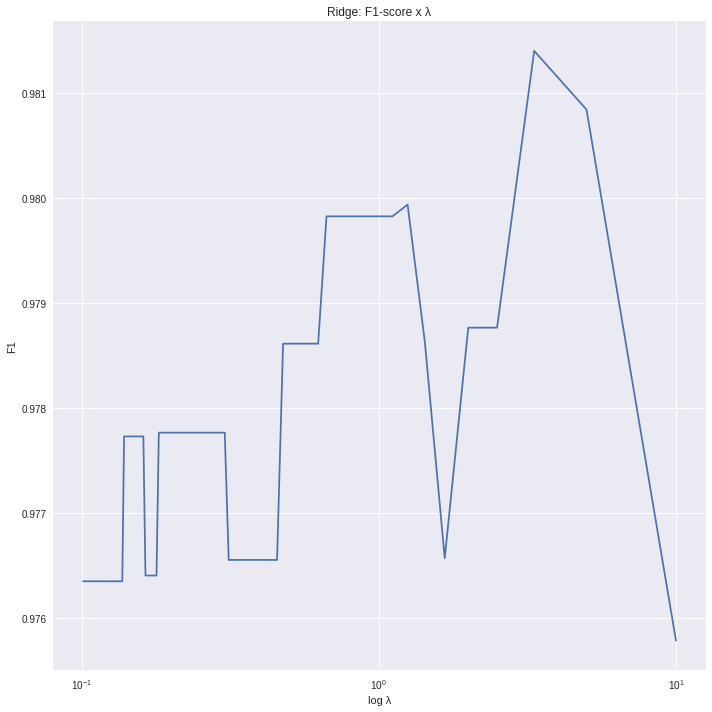

In [46]:
f1s = []
coefs = []
lambda_range = np.arange(0.1, 10, 0.1)
kf = KFold(n_splits=5)
plt.figure(figsize=(10,10), tight_layout=True)
for l in lambda_range:
    model = LogisticRegression(penalty='l2', C=l)
    cv_result = cross_validate(model, X, y, cv=kf, scoring='f1', return_estimator=True)
    f1s.append(np.mean(cv_result['test_score']))
    coefs.append(cv_result['estimator'][np.argmax(cv_result['test_score'])].coef_)
plt.plot((1 / lambda_range), f1s)
plt.xticks((1 / lambda_range))
plt.xscale('log')
plt.xlabel('log λ')
plt.ylabel('F1')
plt.title('Ridge: F1-score x λ')

print('Max F1: ', np.max(f1s))
print(list(X.columns[np.squeeze(np.abs(np.ceil(coefs[np.argmax(f1s)])) == 1)]))

Max F1:  0.9747474552564818
['texture error', 'compactness error', 'fractal dimension error', 'worst texture', 'worst area', 'worst concave points']


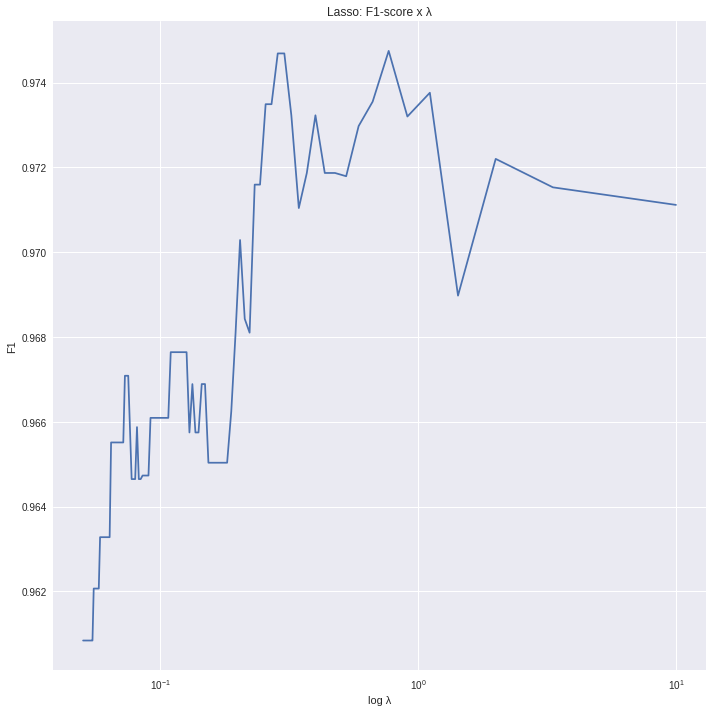

In [44]:
f1s = []
coefs = []
lambda_range = np.arange(0.1, 20, 0.2)
kf = KFold(n_splits=5)
plt.figure(figsize=(10,10), tight_layout=True)
for l in lambda_range:
    model = LogisticRegression(penalty='l1', C=1/l, solver='liblinear')
    cv_result = cross_validate(model, X, y, cv=kf, scoring='f1', return_estimator=True)
    f1s.append(np.mean(cv_result['test_score']))
    coefs.append(cv_result['estimator'][np.argmax(cv_result['test_score'])].coef_)
plt.plot((1 / lambda_range), f1s)
plt.xscale('log')
plt.xlabel('log λ')
plt.ylabel('F1')
plt.title('Lasso: F1-score x λ')

print('Max F1: ', np.max(f1s))
print(list(X.columns[np.squeeze(np.abs(np.ceil(coefs[np.argmax(f1s)])) == 1)]))

***Discussão:*** Escolheria o modelo sugerido pelo Lasso com melhor desempenho, por possuir uma diferença muito pequena com o melhor valor indicado pelo Ridge mas ser mais simples, com 3 variáveis a menos.


b) A regressão lasso (l1) possui um comportamento similar à seleção retroativa, pois começa com todos os preditores e vai eliminando-os à medida que a regularização aumenta.

Compare o modelo com k preditores que você escolheu no exercício 2.1(b), com o lasso com $\lambda$ escolhido no exercício 2.2(a). 

Verifique e indique quais foram as variáveis removidas em cada modelo (no lasso, veja quais variáveis ficaram com coeficiente zero).

Discutas as diferenças e similares nos resultados gerados pelos modelos em termos de desempenho e variáveis mantidas vs removidas.



***Discussão:***

No Backward Selection as variáveis ótimas escolhidas foram 19:

* mean concave points
* mean symmetry
* mean fractal dimension
* radius error
* texture error
* area error
* smoothness error
* concave points error
* fractal dimension error
* worst radius
* worst texture
* worst perimeter
* worst area
* worst smoothness
* worst compactness
* worst concavity
* worst concave points
* worst symmetry
* worst fractal dimension

No Lasso as variáveis ótimas escolhidas foram 6:

* texture error
* compactness error
* fractal dimension error
* worst texture
* worst area
* worst concave points

Embora o resultado do backward tenha sido levemente melhor, o modelo é muito mais complexo, com 13 variáveis a mais.

### 2.3 Regressão Logística com Elastic Net (2 pontos)

É possível colocar as penalidade L1 e L2 em um mesmo modelo. Neste caso, chamamos o modelo de ElasticNet. Na classe `LogisticRegression` do scikit ele pode ser ativado passando o atributo `penalty='elasticnet'`

Note que agora temos 2 atributos relativos à regularização, o `C`, usado no item 2.2(a) e `l1_ratio`, que indica se a regularização é mais forte na penalidade `L1` (valores próximos de 1), ou da `L2` (valores mais próximos de 0).

a) Execute o modelo da elasticnet com 5 diferentes combinações de valores `C` e `l1_ratio`, e imprima os erros `f1`, `accuracy`, `precision`, e `recall` usando validação cruzada.


In [78]:
acc = []
pre = []
rec = []
f1s = []
coefs = []

a = []

C = [0.25, 0.5, 0.75]

kf = KFold(n_splits=5)
plt.figure(figsize=(10,10), tight_layout=True)
for i in C:
    for j in reversed(C):
        model = LogisticRegression(penalty='elasticnet', C=i, l1_ratio=j, solver='saga')
        cv_result = cross_validate(model, X, y, cv=kf, scoring=('f1', 'accuracy', 'precision', 'recall'), return_estimator=True)
        acc.append(np.mean(cv_result['test_accuracy']))
        pre.append(np.mean(cv_result['test_precision']))
        rec.append(np.mean(cv_result['test_recall']))
        f1s.append(np.mean(cv_result['test_f1']))

pd.DataFrame({'accuracy': acc, 'precision': pre, 'recall': rec, 'f1': f1s})

,accuracy,precision,recall,f1
0,0.971914,0.954845,0.995348,0.974035
1,0.971914,0.954845,0.995348,0.974035
2,0.973669,0.961006,0.992995,0.976210
3,0.975423,0.964614,0.992995,0.978186
4,0.975423,0.964614,0.992995,0.978186
5,0.975423,0.965677,0.992995,0.978766
6,0.975423,0.964451,0.992995,0.978056
7,0.977177,0.968206,0.992995,0.980073
8,0.977177,0.968206,0.992995,0.980073


<Figure size 720x720 with 0 Axes>

b) Avaliaremos agora o desempenho da elasticnet com diferentes valores para `C` e `l1_ratio`. 

Para tal, gere um único gráfico contendo os F-score no eixo X e o valor de `C` no eixo X em escala log. O gráfico deverá conter 5 curvas, para valores de `l1_ratio` iguais a `[0, 0.25, 0.5, 0.75, 1.0]`.


Em seguida, discuta os resultados, explicando quais valores vocês escolheria para os parâmetros e o motivo.

[]

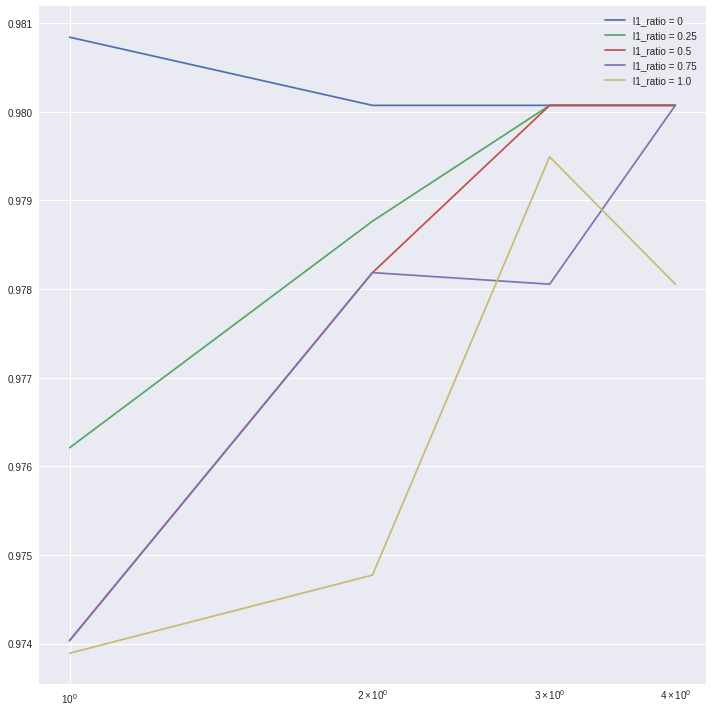

In [79]:
f1s = {}
coefs = {}
C = [0, 0.25, 0.5, 0.75, 1.0]
kf = KFold(n_splits=5)

for i in C:
    for j in C:
        if j not in f1s:
            f1s[j] = []
        model = LogisticRegression(penalty='elasticnet', C=i, l1_ratio=j, solver='saga')
        cv_result = cross_validate(model, X, y, cv=kf, scoring='f1')
        f1s[j].append(np.mean(cv_result['test_score']))
        
plt.figure(figsize=(10,10), tight_layout=True)
for i, f1 in f1s.items():
    plt.plot(f1, label=f'l1_ratio = {i}')
plt.xscale('log')
plt.legend()
plt.plot()

***Discussão:*** O melhor caso obtido pela ElasticNet foi quando `l1_ratio = 0` e C = 1 ($10^0$). Como esse caso possui `l1_ratio = 0`, o parâmetro da regularização L1 é nula e então se trata da regularização Ridge treinada no exercício anterior. Vendo apenas o ajuste do modelo, esse modelo é o melhor que pode ser obtido usando regularização.